In [1]:
# importing libraries
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('churn_prediction.csv')
df.shape

(28382, 21)

In [3]:
df.head(10)

customer_id  vintage  age  gender  dependents     occupation    city  \
0            1     3135   66    Male         0.0  self_employed   187.0   
1            2      310   35    Male         0.0  self_employed     NaN   
2            4     2356   31    Male         0.0       salaried   146.0   
3            5      478   90     NaN         NaN  self_employed  1020.0   
4            6     2531   42    Male         2.0  self_employed  1494.0   
5            7      263   42  Female         0.0  self_employed  1096.0   
6            8     5922   72    Male         0.0        retired  1020.0   
7            9     1145   46    Male         0.0  self_employed   623.0   
8           10     2132   31    Male         0.0       salaried  1096.0   
9           11     3379   40    Male         3.0  self_employed  1020.0   

   customer_nw_category  branch_code  days_since_last_transaction  ...  \
0                     2          755                        224.0  ...   
1                     2         3214                         60.0  ...   
2                     2           41                          NaN  ...   
3                     2          582                        147.0  ...   
4                     3          388                         58.0  ...   
5                     2         1666                         60.0  ...   
6                     1            1                         98.0  ...   
7                     2          317                        172.0  ...   
8                     2         4110                         19.0  ...   
9                     2           38                          0.0  ...   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   
5                    16059.34                       15211.29   
6                     7714.19                        7859.74   
7                     8519.53                        6511.82   
8                     1355.86                        1702.44   
9                     4244.38                        2168.53   

   average_monthly_balance_prevQ2  current_month_credit  \
0                         1449.07                  0.20   
1                        12419.41                  0.56   
2                         2815.94                  0.61   
3                         1006.54                  0.47   
4                         1871.12                  0.33   
5                        13798.82                  0.36   
6                        11232.37                  0.64   
7                        16314.17                  0.27   
8                         1126.13                714.51   
9                         1864.33               6912.29   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   
5                   0.36               857.50                286.07   
6                   0.64              1299.64                439.26   
7                   0.27               443.13               5688.44   
8                 121.09               714.51                359.44   
9                4206.13              1887.30               1348.85   

   current_month_balance  previous_month_balance  churn  
0                1458.71                 1458.71      0  
1                6496.78                 8787.61      0  
2                5006.28                 5070.14   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
customer_id                       28382 non-null int64
vintage                           28382 non-null int64
age                               28382 non-null int64
gender                            27857 non-null object
dependents                        25919 non-null float64
occupation                        28302 non-null object
city                              27579 non-null float64
customer_nw_category              28382 non-null int64
branch_code                       28382 non-null int64
days_since_last_transaction       25159 non-null float64
current_balance                   28382 non-null float64
previous_month_end_balance        28382 non-null float64
average_monthly_balance_prevQ     28382 non-null float64
average_monthly_balance_prevQ2    28382 non-null float64
current_month_credit              28382 non-null float64
previous_month_credit             28382 non-null

In [5]:
df.describe()

customer_id       vintage           age    dependents          city  \
count  28382.000000  28382.000000  28382.000000  25919.000000  27579.000000   
mean   15143.508667   2364.336446     48.208336      0.347236    796.109576   
std     8746.454456   1610.124506     17.807163      0.997661    432.872102   
min        1.000000    180.000000      1.000000      0.000000      0.000000   
25%     7557.250000   1121.000000     36.000000      0.000000    409.000000   
50%    15150.500000   2018.000000     46.000000      0.000000    834.000000   
75%    22706.750000   3176.000000     60.000000      0.000000   1096.000000   
max    30301.000000  12899.000000     90.000000     52.000000   1649.000000   

       customer_nw_category   branch_code  days_since_last_transaction  \
count          28382.000000  28382.000000                 25159.000000   
mean               2.225530    925.975019                    69.997814   
std                0.660443    937.799129                    86.341098   
min                1.000000      1.000000                     0.000000   
25%                2.000000    176.000000                    11.000000   
50%                2.000000    572.000000                    30.000000   
75%                3.000000   1440.000000                    95.000000   
max                3.000000   4782.000000                   365.000000   

       current_balance  previous_month_end_balance  \
count     2.838200e+04                2.838200e+04   
mean      7.380552e+03                7.495771e+03   
std       4.259871e+04                4.252935e+04   
min      -5.503960e+03               -3.149570e+03   
25%       1.784470e+03                1.906000e+03   
50%       3.281255e+03                3.379915e+03   
75%       6.635820e+03                6.656535e+03   
max       5.905904e+06                5.740439e+06   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
count                   2.838200e+04                    2.838200e+04   
mean                    7.496780e+03                    7.124209e+03   
std                     4.172622e+04                    4.457581e+04   
min                     1.428690e+03                   -1.650610e+04   
25%                     2.180945e+03                    1.832507e+03   
50%                     3.542865e+03                    3.359600e+03   
75%                     6.666887e+03                    6.517960e+03   
max                     5.700290e+06                    5.010170e+06   

       current_month_credit  previous_month_credit  current_month_debit  \
count          2.838200e+04           2.838200e+04         2.838200e+04   
mean           3.433252e+03           3.261694e+03         3.658745e+03   
std            7.707145e+04           2.968889e+04         5.198542e+04   
min            1.000000e-02           1.000000e-02         1.000000e-02   
25%            3.100000e-01           3.300000e-01         4.100000e-01   
50%            6.100000e-01           6.300000e-01         9.193000e+01   
75%            7.072725e+02           7.492350e+02         1.360435e+03   
max            1.226985e+07           2.361808e+06         7.637857e+06   

       previous_month_debit  current_month_balance  previous_month_balance  \
count          2.838200e+04           2.838200e+04            2.838200e+04   
mean           3.339761e+03           7.451133e+03            7.495177e+03   
std            2.430111e+04           4.203394e+04            4.243198e+04   
min            1.000000e-02          -3.374180e+03           -5.171920e+03   
25%            4.100000e-01           1.996765e+03            2.074408e+03   
50%            1.099600e+02           3.447995e+03            3.465235e+03   
75%            1.357553e+03           6.667958e+03            6.654693e+03   
max            1.414168e+06           5.778185e+06            5.720144e+06   

              churn  
count  28382.000000  
mean       0.185329  
std        0.388571  
min        0.000000  
25% 

In [10]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [11]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [12]:
# treating the missing values in gender column

a = df['gender'].mode()
a

0    Male
dtype: object

In [13]:
df['gender'].fillna('Male' , inplace = True)
df

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     3135   66    Male         0.0  self_employed   187.0   
1                2      310   35    Male         0.0  self_employed     NaN   
2                4     2356   31    Male         0.0       salaried   146.0   
3                5      478   90    Male         NaN  self_employed  1020.0   
4                6     2531   42    Male         2.0  self_employed  1494.0   
5                7      263   42  Female         0.0  self_employed  1096.0   
6                8     5922   72    Male         0.0        retired  1020.0   
7                9     1145   46    Male         0.0  self_employed   623.0   
8               10     2132   31    Male         0.0       salaried  1096.0   
9               11     3379   40    Male         3.0  self_employed  1020.0   
10              12      661   68    Male         0.0        retired   409.0   
11              13     7108   32    Male         0.0       salaried  1096.0   
12              14     2438   73    Male         0.0        retired    44.0   
13              15     5703   50    Male         0.0       salaried   409.0   
14              16     2314   48  Female         0.0  self_employed   665.0   
15              17     1934   51  Female         0.0  self_employed  1232.0   
16              19     2723   49    Male         0.0  self_employed  1125.0   
17              20     6111   52  Female         0.0  self_employed  1096.0   
18              21     5821   47  Female         1.0  self_employed   146.0   
19              22     3500   41  Female         0.0  self_employed  1020.0   
20              23     5724   45    Male         0.0  self_employed  1020.0   
21              24     2083   29  Female         0.0  self_employed  1020.0   
22              25     3101   41  Female         0.0  self_employed   905.0   
23              26     1897   34    Male         0.0  self_employed   931.0   
24              27      754   48    Male         2.0       salaried   218.0   
25              28      606   76    Male         NaN  self_employed  1533.0   
26              29     2620   36    Male         2.0  self_employed  1563.0   
27              30     1391   56    Male         0.0  self_employed   836.0   
28              31     4175   55    Male         0.0  self_employed   118.0   
29              32     2204   33  Female         0.0       salaried   834.0   
...            ...      ...  ...     ...         ...            ...     ...   
28352        30271     2298   29  Female         0.0  self_employed  1020.0   
28353        30272     2215   25  Female         0.0        student  1589.0   
28354        30273      409   65  Female         NaN  self_employed   243.0   
28355        30274     5116   45    Male         2.0  self_employed  1540.0   
28356        30275     3049   47    Male         2.0  self_employed   231.0   
28357        30276     1264   40    Male         1.0  self_employed  1020.0   
28358        30277     4087   36    Male         0.0  self_employed  1020.0   
28359        30278     3377   39    Male         0.0       salaried   409.0   
28360        30280     4801   41  Female         0.0  self_employed   834.0   
28361        30281     5171   45    Male         0.0       salaried   575.0   
28362        30282     1011   26    Male         0.0        student   146.0   
28363        30283     3409   26  Female         0.0        student   334.0   
28364        30284     1936   72    Male         0.0  self_employed   656.0   
28365        30285     3853   35    Male         0.0  self_employed   223.0   
28366        30286     1432   90    Male         0.0  self_employed   485.0   
28367        30287     2401   34  Female         0.0  self_employed   409.0   
28368        30288      244   78  Female         NaN  self_employed   362.0   
28369        30289      486   28    Male         0.0  self_employed  1437.0   
28370        30290     1601   71  Female         0.0  sel

In [15]:
b = df['dependents'].value_counts()
b

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [18]:
df['dependents'].fillna(0 , inplace = True)
df

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     3135   66    Male         0.0  self_employed   187.0   
1                2      310   35    Male         0.0  self_employed     NaN   
2                4     2356   31    Male         0.0       salaried   146.0   
3                5      478   90    Male         0.0  self_employed  1020.0   
4                6     2531   42    Male         2.0  self_employed  1494.0   
5                7      263   42  Female         0.0  self_employed  1096.0   
6                8     5922   72    Male         0.0        retired  1020.0   
7                9     1145   46    Male         0.0  self_employed   623.0   
8               10     2132   31    Male         0.0       salaried  1096.0   
9               11     3379   40    Male         3.0  self_employed  1020.0   
10              12      661   68    Male         0.0        retired   409.0   
11              13     7108   32    Male         0.0       salaried  1096.0   
12              14     2438   73    Male         0.0        retired    44.0   
13              15     5703   50    Male         0.0       salaried   409.0   
14              16     2314   48  Female         0.0  self_employed   665.0   
15              17     1934   51  Female         0.0  self_employed  1232.0   
16              19     2723   49    Male         0.0  self_employed  1125.0   
17              20     6111   52  Female         0.0  self_employed  1096.0   
18              21     5821   47  Female         1.0  self_employed   146.0   
19              22     3500   41  Female         0.0  self_employed  1020.0   
20              23     5724   45    Male         0.0  self_employed  1020.0   
21              24     2083   29  Female         0.0  self_employed  1020.0   
22              25     3101   41  Female         0.0  self_employed   905.0   
23              26     1897   34    Male         0.0  self_employed   931.0   
24              27      754   48    Male         2.0       salaried   218.0   
25              28      606   76    Male         0.0  self_employed  1533.0   
26              29     2620   36    Male         2.0  self_employed  1563.0   
27              30     1391   56    Male         0.0  self_employed   836.0   
28              31     4175   55    Male         0.0  self_employed   118.0   
29              32     2204   33  Female         0.0       salaried   834.0   
...            ...      ...  ...     ...         ...            ...     ...   
28352        30271     2298   29  Female         0.0  self_employed  1020.0   
28353        30272     2215   25  Female         0.0        student  1589.0   
28354        30273      409   65  Female         0.0  self_employed   243.0   
28355        30274     5116   45    Male         2.0  self_employed  1540.0   
28356        30275     3049   47    Male         2.0  self_employed   231.0   
28357        30276     1264   40    Male         1.0  self_employed  1020.0   
28358        30277     4087   36    Male         0.0  self_employed  1020.0   
28359        30278     3377   39    Male         0.0       salaried   409.0   
28360        30280     4801   41  Female         0.0  self_employed   834.0   
28361        30281     5171   45    Male         0.0       salaried   575.0   
28362        30282     1011   26    Male         0.0        student   146.0   
28363        30283     3409   26  Female         0.0        student   334.0   
28364        30284     1936   72    Male         0.0  self_employed   656.0   
28365        30285     3853   35    Male         0.0  self_employed   223.0   
28366        30286     1432   90    Male         0.0  self_employed   485.0   
28367        30287     2401   34  Female         0.0  self_employed   409.0   
28368        30288      244   78  Female         0.0  self_employed   362.0   
28369        30289      486   28    Male         0.0  self_employed  1437.0   
28370        30290     1601   71  Female         0.0  sel

In [21]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [22]:
df['occupation'].fillna('self_employed' , inplace = True)
df

customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     3135   66    Male         0.0  self_employed   187.0   
1                2      310   35    Male         0.0  self_employed     NaN   
2                4     2356   31    Male         0.0       salaried   146.0   
3                5      478   90    Male         0.0  self_employed  1020.0   
4                6     2531   42    Male         2.0  self_employed  1494.0   
5                7      263   42  Female         0.0  self_employed  1096.0   
6                8     5922   72    Male         0.0        retired  1020.0   
7                9     1145   46    Male         0.0  self_employed   623.0   
8               10     2132   31    Male         0.0       salaried  1096.0   
9               11     3379   40    Male         3.0  self_employed  1020.0   
10              12      661   68    Male         0.0        retired   409.0   
11              13     7108   32    Male         0.0       salaried  1096.0   
12              14     2438   73    Male         0.0        retired    44.0   
13              15     5703   50    Male         0.0       salaried   409.0   
14              16     2314   48  Female         0.0  self_employed   665.0   
15              17     1934   51  Female         0.0  self_employed  1232.0   
16              19     2723   49    Male         0.0  self_employed  1125.0   
17              20     6111   52  Female         0.0  self_employed  1096.0   
18              21     5821   47  Female         1.0  self_employed   146.0   
19              22     3500   41  Female         0.0  self_employed  1020.0   
20              23     5724   45    Male         0.0  self_employed  1020.0   
21              24     2083   29  Female         0.0  self_employed  1020.0   
22              25     3101   41  Female         0.0  self_employed   905.0   
23              26     1897   34    Male         0.0  self_employed   931.0   
24              27      754   48    Male         2.0       salaried   218.0   
25              28      606   76    Male         0.0  self_employed  1533.0   
26              29     2620   36    Male         2.0  self_employed  1563.0   
27              30     1391   56    Male         0.0  self_employed   836.0   
28              31     4175   55    Male         0.0  self_employed   118.0   
29              32     2204   33  Female         0.0       salaried   834.0   
...            ...      ...  ...     ...         ...            ...     ...   
28352        30271     2298   29  Female         0.0  self_employed  1020.0   
28353        30272     2215   25  Female         0.0        student  1589.0   
28354        30273      409   65  Female         0.0  self_employed   243.0   
28355        30274     5116   45    Male         2.0  self_employed  1540.0   
28356        30275     3049   47    Male         2.0  self_employed   231.0   
28357        30276     1264   40    Male         1.0  self_employed  1020.0   
28358        30277     4087   36    Male         0.0  self_employed  1020.0   
28359        30278     3377   39    Male         0.0       salaried   409.0   
28360        30280     4801   41  Female         0.0  self_employed   834.0   
28361        30281     5171   45    Male         0.0       salaried   575.0   
28362        30282     1011   26    Male         0.0        student   146.0   
28363        30283     3409   26  Female         0.0        student   334.0   
28364        30284     1936   72    Male         0.0  self_employed   656.0   
28365        30285     3853   35    Male         0.0  self_employed   223.0   
28366        30286     1432   90    Male         0.0  self_employed   485.0   
28367        30287     2401   34  Female         0.0  self_employed   409.0   
28368        30288      244   78  Female         0.0  self_employed   362.0   
28369        30289      486   28    Male         0.0  self_employed  1437.0   
28370        30290     1601   71  Female         0.0  sel

In [23]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [25]:
#treating the missing values of days_since_last_transaction

df['days_since_last_transaction'].fillna(df['days_since_last_transaction'].mean() , inplace = True)
df.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     3135   66   Male         0.0  self_employed   187.0   
1            2      310   35   Male         0.0  self_employed     NaN   
2            4     2356   31   Male         0.0       salaried   146.0   
3            5      478   90   Male         0.0  self_employed  1020.0   
4            6     2531   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  days_since_last_transaction  ...  \
0                     2          755                   224.000000  ...   
1                     2         3214                    60.000000  ...   
2                     2           41                    69.997814  ...   
3                     2          582                   147.000000  ...   
4                     3          388                    58.000000  ...   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   

   average_monthly_balance_prevQ2  current_month_credit  \
0                         1449.07                  0.20   
1                        12419.41                  0.56   
2                         2815.94                  0.61   
3                         1006.54                  0.47   
4                         1871.12                  0.33   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   

   current_month_balance  previous_month_balance  churn  
0                1458.71                 1458.71      0  
1                6496.78                 8787.61      0  
2                5006.28                 5070.14      0  
3                2291.91                 1669.79      1  
4                1157.15                 1677.16      1  

[5 rows x 21 columns]

In [33]:
d = df['city'].median()
d

834.0

In [35]:
df['city'].fillna(d , inplace = True)
df.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     3135   66   Male         0.0  self_employed   187.0   
1            2      310   35   Male         0.0  self_employed   834.0   
2            4     2356   31   Male         0.0       salaried   146.0   
3            5      478   90   Male         0.0  self_employed  1020.0   
4            6     2531   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  days_since_last_transaction  ...  \
0                     2          755                   224.000000  ...   
1                     2         3214                    60.000000  ...   
2                     2           41                    69.997814  ...   
3                     2          582                   147.000000  ...   
4                     3          388                    58.000000  ...   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2                     5815.29                        4910.17   
3                     2291.91                        2084.54   
4                     1401.72                        1643.31   

   average_monthly_balance_prevQ2  current_month_credit  \
0                         1449.07                  0.20   
1                        12419.41                  0.56   
2                         2815.94                  0.61   
3                         1006.54                  0.47   
4                         1871.12                  0.33   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27                100.56   
2                   0.61              6046.73                259.23   
3                   0.47                 0.47               2143.33   
4                 714.61               588.62               1538.06   

   current_month_balance  previous_month_balance  churn  
0                1458.71                 1458.71      0  
1                6496.78                 8787.61      0  
2                5006.28                 5070.14      0  
3                2291.91                 1669.79      1  
4                1157.15                 1677.16      1  

[5 rows x 21 columns]

In [37]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [39]:
# separating independent and dependent variables

x = df.drop(['churn'] , axis = 1)
y = df['churn']
x.shape , y.shape

((28382, 20), (28382,))

In [40]:
# importing train test split

from sklearn.model_selection import train_test_split as tts
train_x , test_x , train_y , test_y = tts(x , y , random_state = 56)

In [41]:
train_x.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
dtype: int64

In [42]:
test_x.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
dtype: int64

In [43]:
train_x.head()

customer_id  vintage  age  gender  dependents     occupation    city  \
10858        11606     1111   32    Male         0.0       salaried   623.0   
4003          4266     1878   47  Female         0.0  self_employed    15.0   
517            554     2139   73  Female         0.0        retired  1020.0   
26789        28604     2481   24  Female         0.0        student  1494.0   
15746        16801     4617   45    Male         1.0       salaried  1096.0   

       customer_nw_category  branch_code  days_since_last_transaction  \
10858                     3         2390                     9.000000   
4003                      3          956                    27.000000   
517                       3         1114                    69.997814   
26789                     3         1008                    80.000000   
15746                     1           92                    11.000000   

       current_balance  previous_month_end_balance  \
10858          8478.18                     8183.89   
4003            323.25                       83.25   
517            3000.63                     2143.49   
26789          1844.48                     1844.48   
15746         54128.30                    62693.94   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
10858                        6936.50                          240.01   
4003                         1493.65                          878.52   
517                          2080.64                          918.95   
26789                        2182.42                          213.55   
15746                       66757.16                        51915.52   

       current_month_credit  previous_month_credit  current_month_debit  \
10858                500.76                   0.60               404.89   
4003                 668.66                1342.94               428.66   
517                    0.63                   0.63               357.77   
26789                  0.03                   0.03                 0.03   
15746              54427.09               72769.94             30044.00   

       previous_month_debit  current_month_balance  previous_month_balance  
10858                385.55                8224.40                 8328.92  
4003                   0.09                 617.04                 1551.67  
517                   45.47                3094.31                 1813.99  
26789                  0.03                1844.48                 1844.48  
15746             106229.01               57482.71                90573.93

In [44]:
test_x.head()

customer_id  vintage  age  gender  dependents     occupation    city  \
10054        10729     3954   47  Female         1.0       salaried  1232.0   
20948        22347     2950   31    Male         0.0  self_employed  1096.0   
14688        15679     2884   57  Female         0.0  self_employed   617.0   
4562          4852      780   25    Male         0.0  self_employed  1020.0   
18664        19918     2749   77    Male         0.0        retired   409.0   

       customer_nw_category  branch_code  days_since_last_transaction  \
10054                     2          103                          6.0   
20948                     2           89                         62.0   
14688                     2          229                        124.0   
4562                      3         1105                         76.0   
18664                     3          329                        340.0   

       current_balance  previous_month_end_balance  \
10054          2725.05                     2320.77   
20948          5313.93                     5313.93   
14688          1814.01                     1864.11   
4562            169.17                      169.17   
18664           618.07                      608.07   

       average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
10054                        2684.80                         4817.60   
20948                        5141.89                         4531.79   
14688                        1544.55                         1209.08   
4562                         6571.47                        21610.19   
18664                        2800.38                         2865.87   

       current_month_credit  previous_month_credit  current_month_debit  \
10054                 75.76                   0.04               291.03   
20948                  0.17                   0.17                 0.17   
14688                  0.56                   0.56                24.70   
4562                   0.49                   0.49                 0.49   
18664                  0.23                   0.23                 0.23   

       previous_month_debit  current_month_balance  previous_month_balance  
10054               1437.78                2519.11                 2708.59  
20948                  0.17                5313.93                 5313.93  
14688                 11.41                1827.67                 1735.77  
4562                   0.49                 169.17                  169.17  
18664               9459.90                 612.42                 4286.91

In [46]:
train_x_cat = train_x.select_dtypes(exclude = ['number' , 'bool_' , 'float_'])
train_x_cat.head()

gender     occupation
10858    Male       salaried
4003   Female  self_employed
517    Female        retired
26789  Female        student
15746    Male       salaried

In [51]:
train_x_num = train_x.select_dtypes(exclude=['bool_' , 'object_'])
train_x_num.head()

customer_id  vintage  age  dependents    city  customer_nw_category  \
10858        11606     1111   32         0.0   623.0                     3   
4003          4266     1878   47         0.0    15.0                     3   
517            554     2139   73         0.0  1020.0                     3   
26789        28604     2481   24         0.0  1494.0                     3   
15746        16801     4617   45         1.0  1096.0                     1   

       branch_code  days_since_last_transaction  current_balance  \
10858         2390                     9.000000          8478.18   
4003           956                    27.000000           323.25   
517           1114                    69.997814          3000.63   
26789         1008                    80.000000          1844.48   
15746           92                    11.000000         54128.30   

       previous_month_end_balance  average_monthly_balance_prevQ  \
10858                     8183.89                        6936.50   
4003                        83.25                        1493.65   
517                       2143.49                        2080.64   
26789                     1844.48                        2182.42   
15746                    62693.94                       66757.16   

       average_monthly_balance_prevQ2  current_month_credit  \
10858                          240.01                500.76   
4003                           878.52                668.66   
517                            918.95                  0.63   
26789                          213.55                  0.03   
15746                        51915.52              54427.09   

       previous_month_credit  current_month_debit  previous_month_debit  \
10858                   0.60               404.89                385.55   
4003                 1342.94               428.66                  0.09   
517                     0.63               357.77                 45.47   
26789                   0.03                 0.03                  0.03   
15746               72769.94             30044.00             106229.01   

       current_month_balance  previous_month_balance  
10858                8224.40                 8328.92  
4003                  617.04                 1551.67  
517                  3094.31                 1813.99  
26789                1844.48                 1844.48  
15746               57482.71                90573.93

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff414dca550>,
      dtype=object)

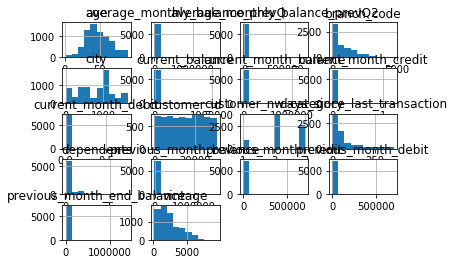

In [52]:
test_x.hist()